## TOV EVOLUTION


Use the Einstein Toolkit to study the evolution of the maximum of the restmass density of a stable TOV solution. 
1. Use 3 different resolutions;
Discuss your results, focusing in particular on the evolution of the maximum of the rest-mass density.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import kuibit.cactus_scalars as cs
import kuibit.simdir as sd
from kuibit import grid_data as gd

In [3]:
sim1 = sd.SimDir("/home/jovyan/simulations/TOV_test1/") #dx,dy,dz= 1
sim3 = sd.SimDir("/home/jovyan/simulations/TOV_test/") #dx,dy,dz= 2
sim2 = sd.SimDir("/home/jovyan/simulations/TOV_test2/") #dx,dy,dz= 1.5

In [4]:
timeseries1 = sim1.timeseries
timeseries2 = sim2.timeseries
timeseries3 = sim3.timeseries

In [5]:
rho_max3=timeseries3.maximum.fields.rho #plot the maximum of rho
rho_max1=timeseries1.maximum.fields.rho 
rho_max2=timeseries2.maximum.fields.rho

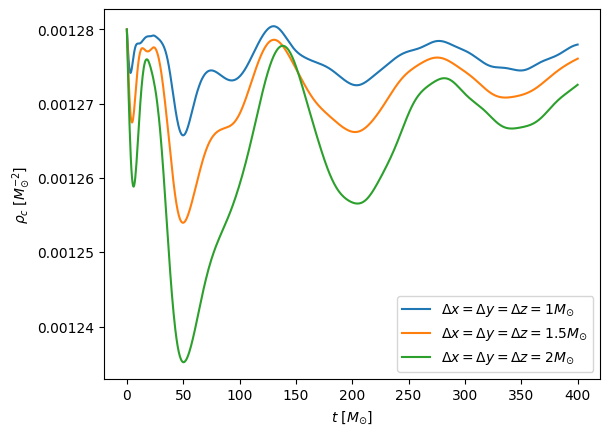

In [6]:

plt.plot(rho_max1, label=r'$\Delta x = \Delta y = \Delta z = 1M_{\odot}$')
plt.plot(rho_max2, label=r'$\Delta x = \Delta y = \Delta z = 1.5M_{\odot}$')
plt.plot(rho_max3, label=r'$\Delta x = \Delta y = \Delta z = 2M_{\odot}$')
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel(r'$\rho_c$ [$M_{\odot}^{-2}$]')
plt.legend()
plt.savefig("/home/jovyan/simulations/oscillations.png", dpi=200, bbox_inches='tight')
plt.show()

#it is in geometrical units!
#we should expect a constant line physically --> instead we have oscillatons 

In [7]:
gf1 = sim1.gf
gf2 = sim2.gf
gf3 = sim3.gf

In [8]:
vars2D3 = gf3.xy
vars2D2 = gf2.xy
vars2D1 = gf1.xy

In [9]:
rho3 = vars2D3.fields.rho #rho in xy axis
rho1 = vars2D1.fields.rho #rho in xy axis
rho2 = vars2D2.fields.rho #rho in xy axis

In [10]:
iter1=max(rho1.iterations)
iters2=max(rho2.iterations)
iters3=max(rho3.iterations)

'Inital data on the equatorial plane'

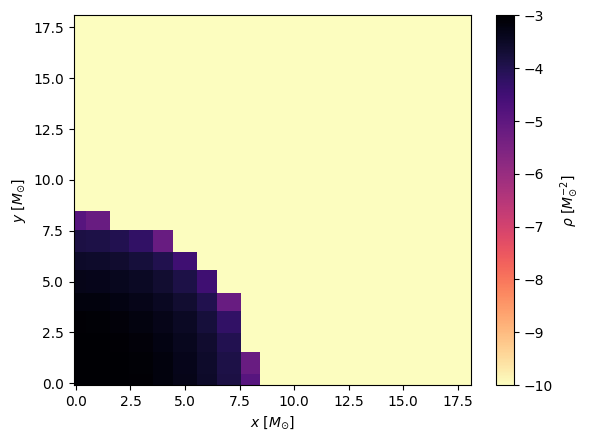

In [24]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18]) #2D uniform grid
# bottom left and top right corner 

rho_small3 = rho3.read_on_grid(0, small_grid) #for initial data 
#rho_small3 = rho3.read_on_grid(iters3, small_grid) 

cf = plt.pcolormesh(*rho_small3.coordinates_meshgrid(), np.log10(rho_small3.data_xyz), vmin=-10, vmax=-3, cmap='magma_r')
plt.colorbar(cf, label=r'$\rho$ [$M_{\odot}^{-2}$]')
plt.xlabel(r'$x$ [$M_{\odot}$]')
plt.ylabel(r'$y$ [$M_{\odot}$]')
plt.savefig("/home/jovyan/simulations/in2.png", dpi=200)

"""Inital data on the equatorial plane"""

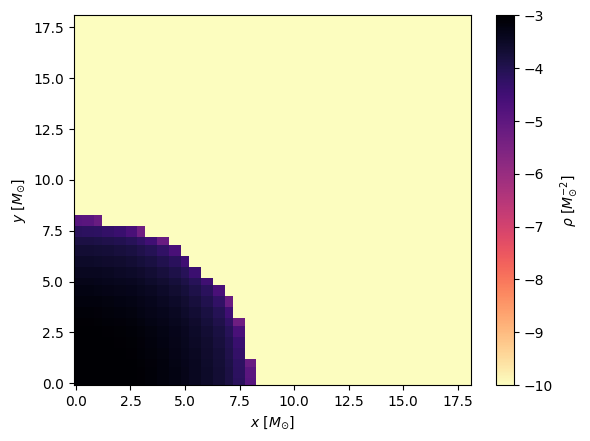

In [22]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18]) #2D uniform grid
# bottom left and top right corner 

rho_small1 = rho1.read_on_grid(0, small_grid) #for initial data
#rho_small1 = rho1.read_on_grid(iter1, small_grid) 

cf = plt.pcolormesh(*rho_small1.coordinates_meshgrid(), np.log10(rho_small1.data_xyz), vmin=-10, vmax=-3, cmap='magma_r')
plt.colorbar(cf, label=r'$\rho$ [$M_{\odot}^{-2}$]')
plt.xlabel(r'$x$ [$M_{\odot}$]')
plt.ylabel(r'$y$ [$M_{\odot}$]')
plt.savefig("/home/jovyan/simulations/in1.png", dpi=200)

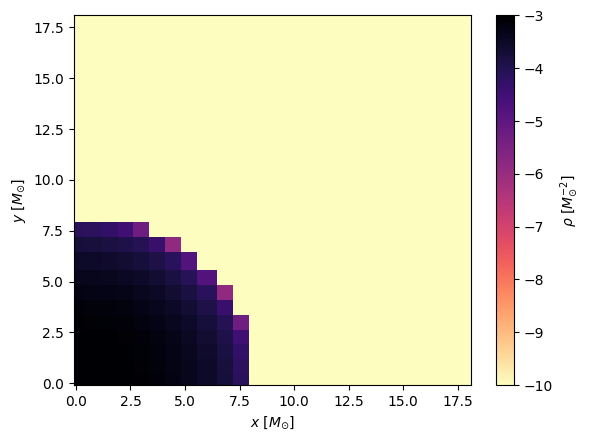

In [23]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18]) #2D uniform grid
# bottom left and top right corner 


rho_small2 = rho2.read_on_grid(0, small_grid) #for initial data
#rho_small2 = rho2.read_on_grid(iters2, small_grid) 

cf = plt.pcolormesh(*rho_small2.coordinates_meshgrid(), np.log10(rho_small2.data_xyz), vmin=-10, vmax=-3, cmap='magma_r')
plt.colorbar(cf, label=r'$\rho$ [$M_{\odot}^{-2}$]')
plt.xlabel(r'$x$ [$M_{\odot}$]')
plt.ylabel(r'$y$ [$M_{\odot}$]')
plt.savefig("/home/jovyan/simulations/in1.5.png", dpi=200)

In [14]:
#It is not a spheare!! 

In [15]:
#generate unit frame and then combine it for a movie like for advection eq

#for i in rho.iterations:
#    print(i)
#    rho_small = rho.read_on_grid(i, small_grid)
#    cf2=plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
#    plt.savefig("frame_"+str(i)+".png")

### MOVIE

In [16]:
from IPython.display import HTML
import matplotlib.animation as animation
ims = []
fig,ax = plt.subplots()

for i in rho3.iterations[0::1]:
    rho_small3 = rho3.read_on_grid(i, small_grid)
    ax.set_xlabel(r'$x (M_\odot)$')
    ax.set_ylabel(r'$y (M_\odot)$')
    ax.set_aspect('equal')
    im = ax.pcolormesh(*rho_small3.coordinates_meshgrid(), np.log10(rho_small3.data_xyz), animated=True, vmin=-10, vmax=-3)
    plt.plot()
    #plt.colorbar(im)
    title = ax.text(0.5,1.05,('Time='+str(rho3.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    ims.append([im, title])
    plt.close()
    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())